In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Datasets/ElectricCarData_Clean.csv')

Para un entendimiento claro, se menciona que se dentro del dataset se ecneuntran datos de vehiculos electricos, por lo que en ese contexto se ecplican las columnas que se tienen.

In [4]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
df.shape

(103, 14)

El dataset tiene 103 filas de datos con 14 columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [7]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [8]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                 Nulos  Porcentaje
Brand                0         0.0
Model                0         0.0
AccelSec             0         0.0
TopSpeed_KmH         0         0.0
Range_Km             0         0.0
Efficiency_WhKm      0         0.0
FastCharge_KmH       0         0.0
RapidCharge          0         0.0
PowerTrain           0         0.0
PlugType             0         0.0
BodyStyle            0         0.0
Segment              0         0.0
Seats                0         0.0
PriceEuro            0         0.0


El dataset contiene datos que se encuentran limpios puesto que no se haya ningun dato Nulo en ninguna de las columnas

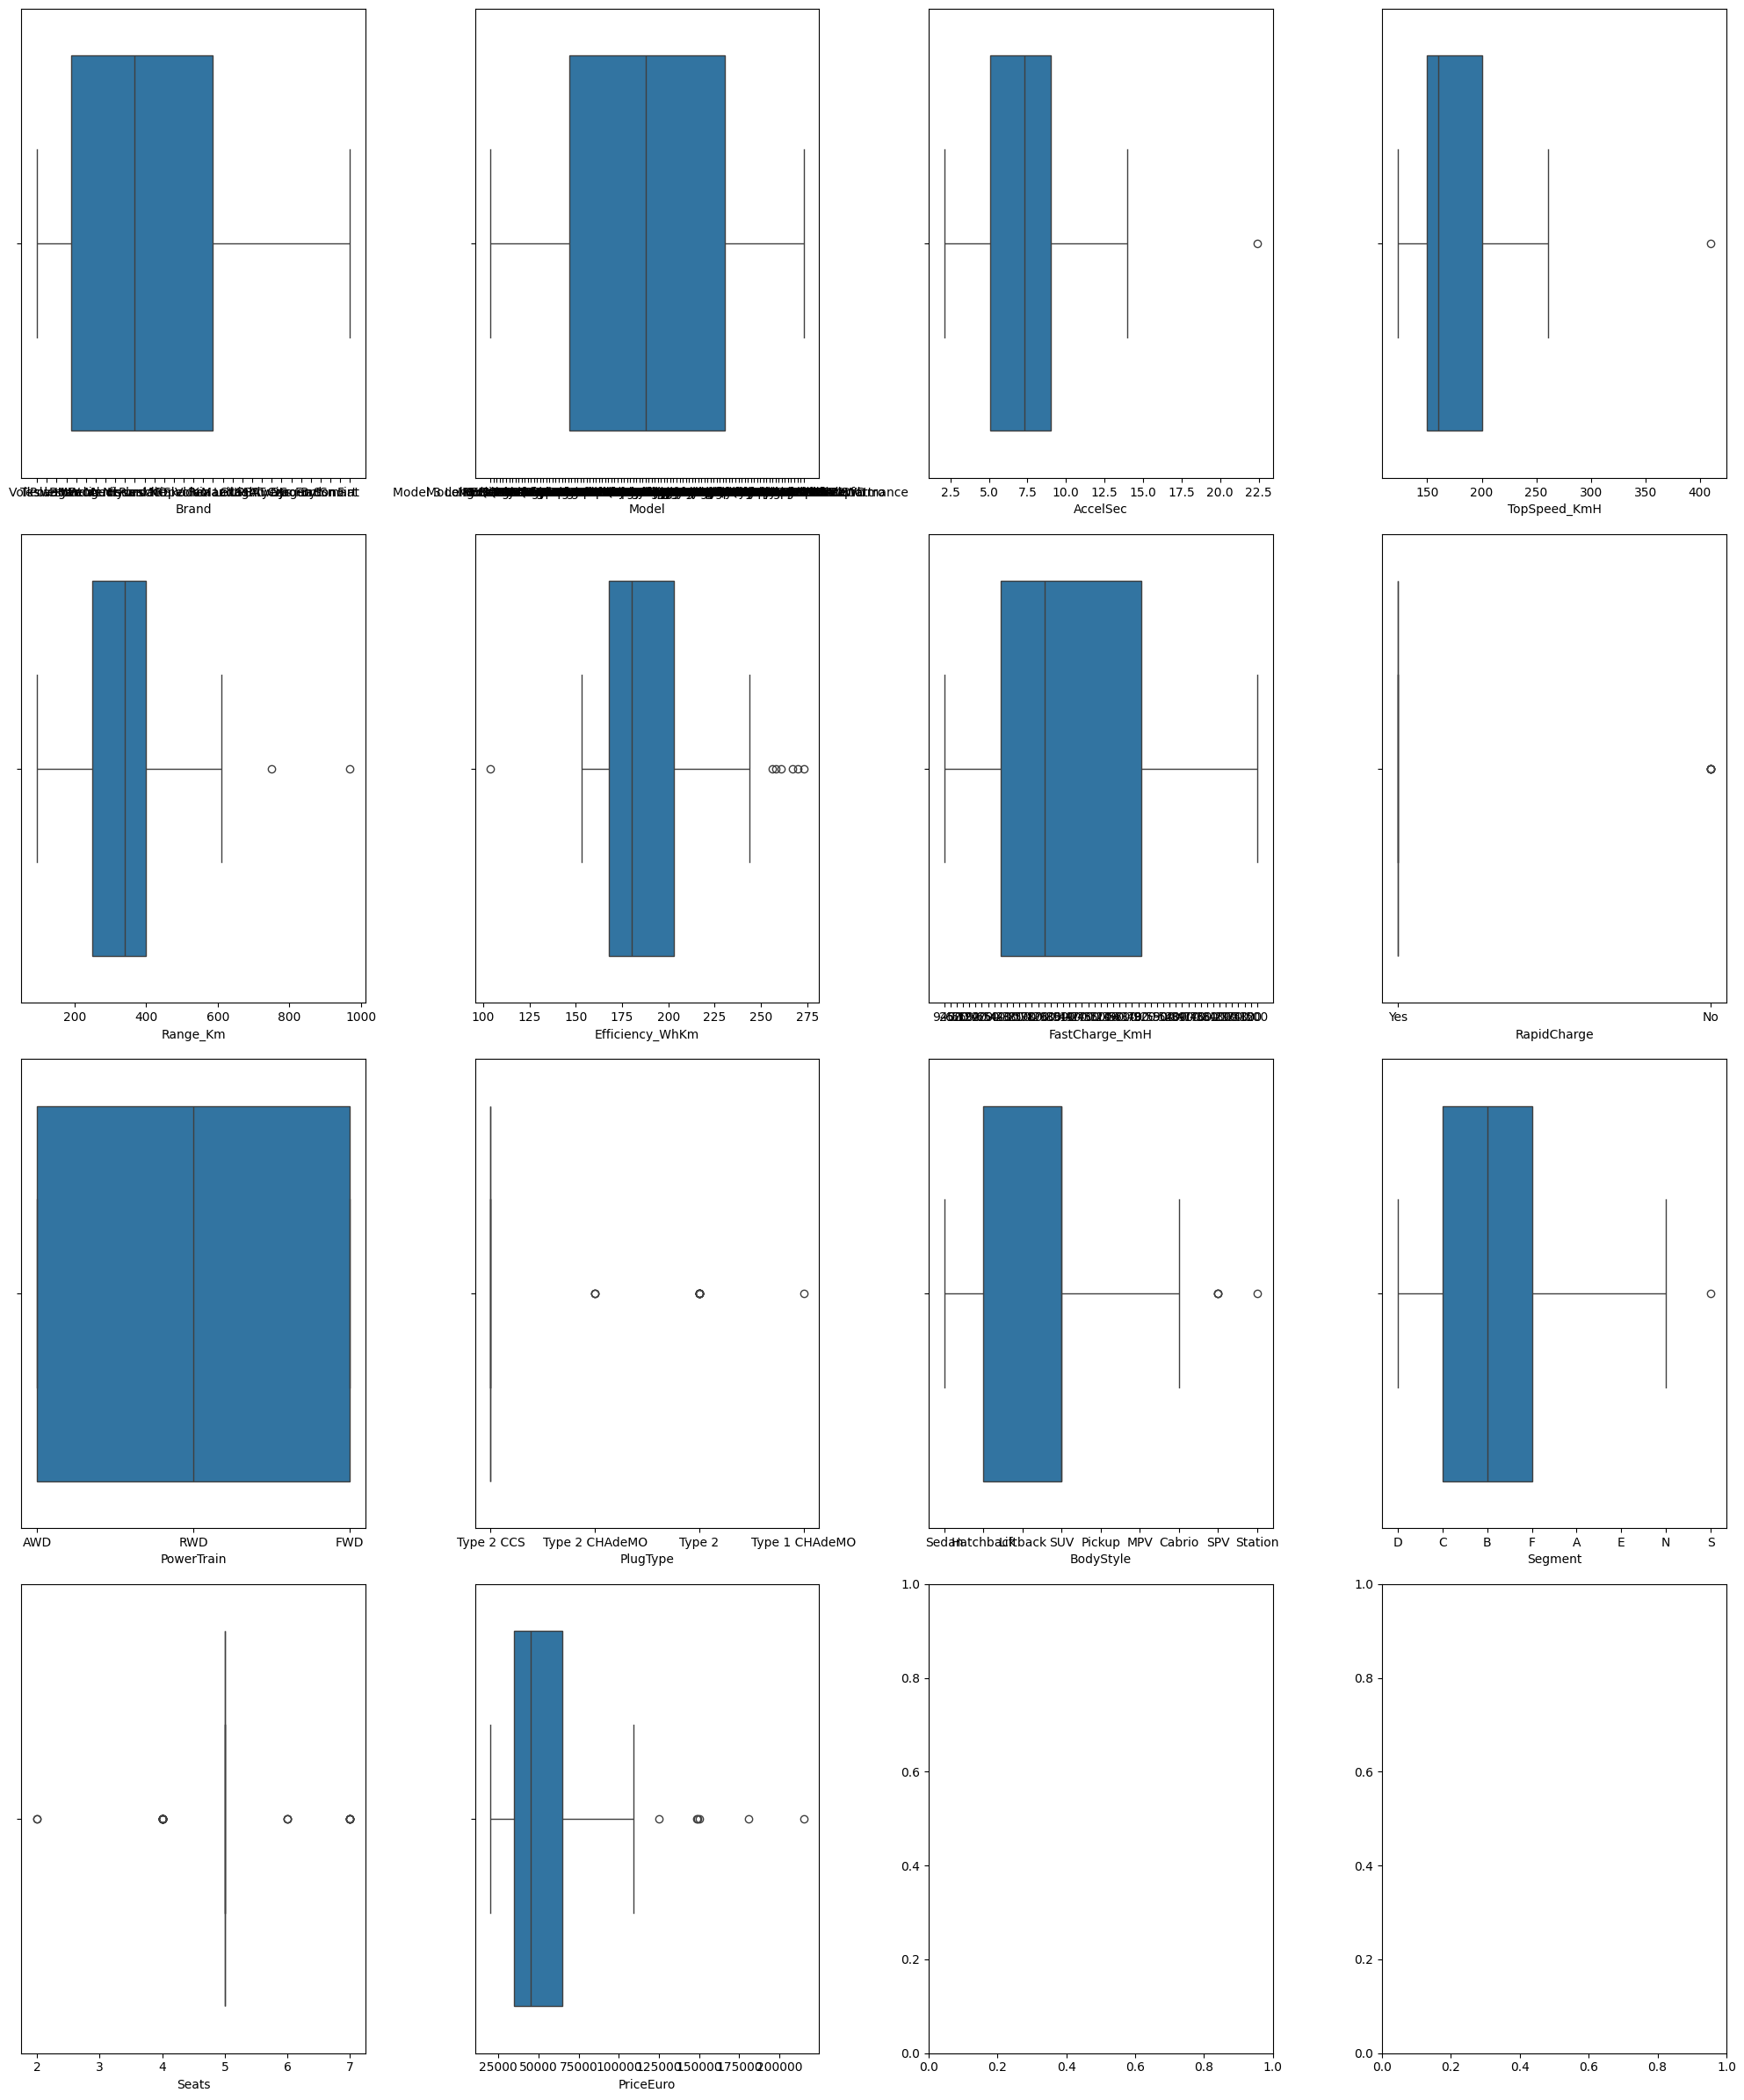

In [9]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(4, 4, figsize=(20, 24))
# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()
# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:16]):  # Asegúrate de tener 16 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)
# Ajustar el layout para evitar solapamiento
plt.tight_layout()
# Mostrar el gráfico
plt.show()

Dentro del dataset existen columnas de datos que cuentan con outliers, la primera de ellas:
- AccelSec, esta columna n¿muestra la aceleracion de estos automoviles en segundos, normalmente aceleracion de 0 a 100km en segundosml, el diagrama de caja indica que autos que demoran màs de 15 segundos en llegar a esa velocidad es considerado un dato fuera del dataset
- TopSpeed, esta columna muestra la velocidad mayor, y en el diagrama de caja se aprecia como velocidades por encima de los 275km aproximadamente tambien son considerados outliers
- Range_km, indica Autonomía en km, se refiere a la distancia máxima que puede recorrer el vehículo eléctrico con una sola carga de la batería, medida en kilómetros. de acuerdo al diagrama de cajas autonomias con valores mayores a 600km son considerados outliers
- 'Efficiency_WhKm', se refiere a la cantidad de energía que consume el vehículo eléctrico por cada kilómetro recorrido, medida en watios-hora por kilómetro (Wh/km). de acuerdo al diagrama valores de entre 150 y 250 son considerados normales, fuera de este rango son outliers
- Dentro de PriceEuro, datos mayores a 110k euros como valor del precio es considerado outlier
- Las columnas Brand, FastCharge, Rapidcharge, PlugType, BodyStyle, Segment, seon columnas de typo object por lo que no es pertinente considerarlas para el analisis de cajas

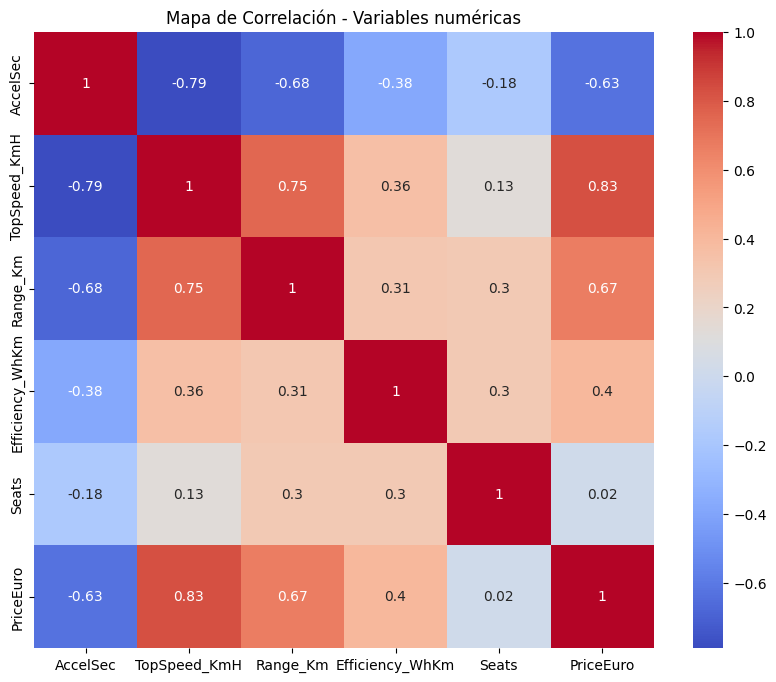

In [10]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Gracias al mapa de correlación se puede notar como existe y se da la realacion entre variables
- Las variables TopSpeed tiene gran correlacion positiva con PriceEuro, es decir que a mayor precio del automovil, mayor sera la velocidad que puede alcanzar
- TopSpeed presenta fuerte correalación con Range_Km, es decir que si un automovil alcanza velocidades altas, también tendra mayor autonomía, algo que suena muy lógico
- Range_km presenta gran correlacion con PriceEuro es decir a mayor precio del auto, mayor sera la autonomia 
- AccelSec tambien presenta correlaciones negativas con: topSpeed, Range_Km, eficiencia_km y PriceEuro, esto significa que a mayor aceleracion en segundos, menor sera la maxima velocidad, menor sera la autonomia, menor sera la eficienci y menor sera el precio. tambien puede suceder todo lo contrario: a menor aceleracion en segundos, mayor sera la maxima velocidad, mayor sera la autonomia, mayor sera la eficienci y mayor sera el precio.

Cabe mencionar que las correlaciones no implican causalidad, pero si se puede tener un panorama del comportamiento de los datos


---
Funciones para graficar
---
---

In [11]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'Top 30 {colum} vehiculos electricos')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum}')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

---
Analisis EDA en conjunto
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


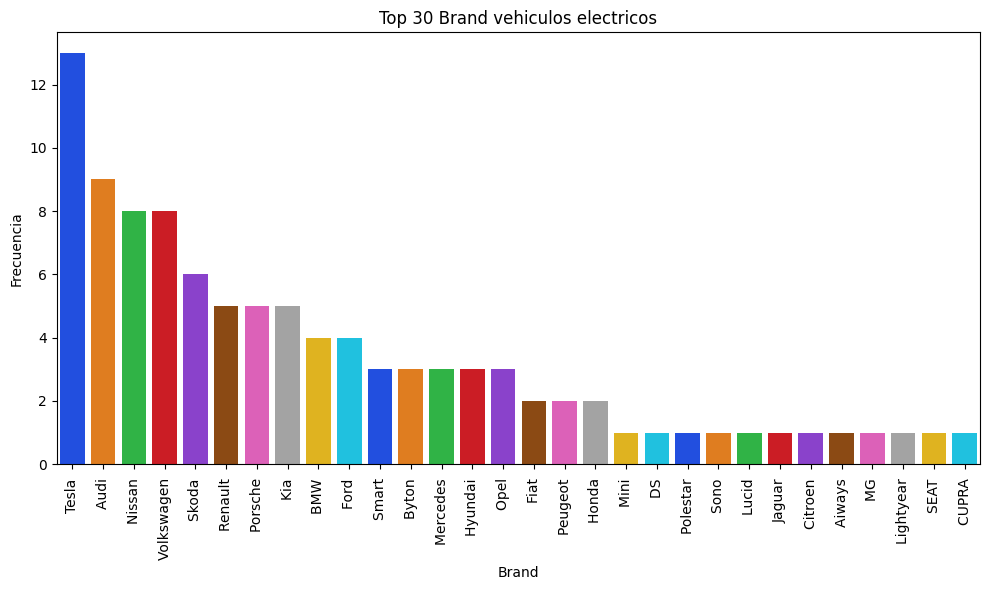

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


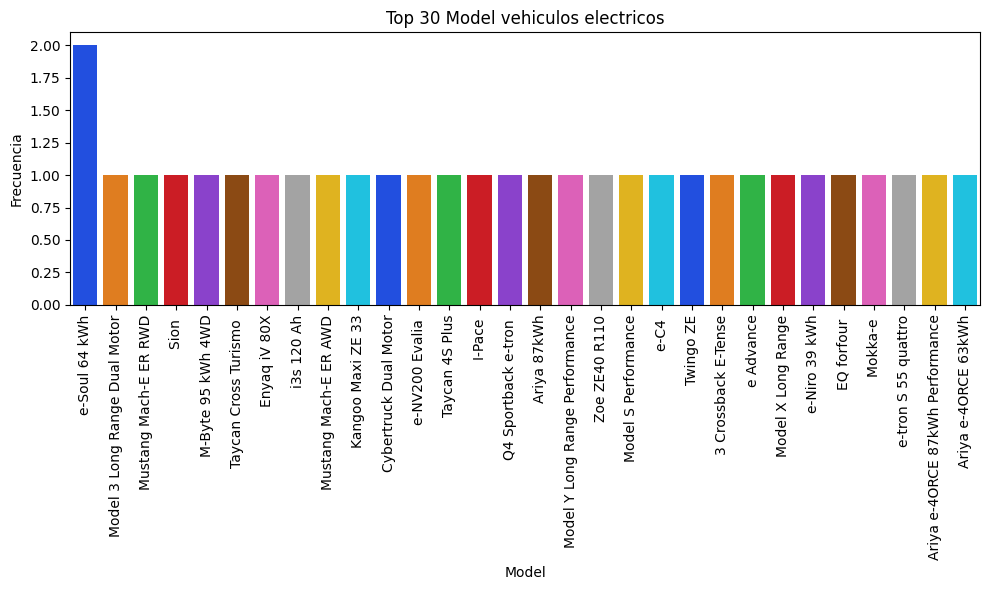

Model
e-Soul 64 kWh                      2
Model 3 Long Range Dual Motor      1
Mustang Mach-E ER RWD              1
Sion                               1
M-Byte 95 kWh 4WD                  1
Taycan Cross Turismo               1
Enyaq iV 80X                       1
i3s 120 Ah                         1
Mustang Mach-E ER AWD              1
Kangoo Maxi ZE 33                  1
Cybertruck Dual Motor              1
e-NV200 Evalia                     1
Taycan 4S Plus                     1
I-Pace                             1
Q4 Sportback e-tron                1
Ariya 87kWh                        1
Model Y Long Range Performance     1
Zoe ZE40 R110                      1
Model S Performance                1
e-C4                               1
Twingo ZE                          1
3 Crossback E-Tense                1
e Advance                          1
Model X Long Range                 1
e-Niro 39 kWh                      1
EQ forfour                         1
Mokka-e                         

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


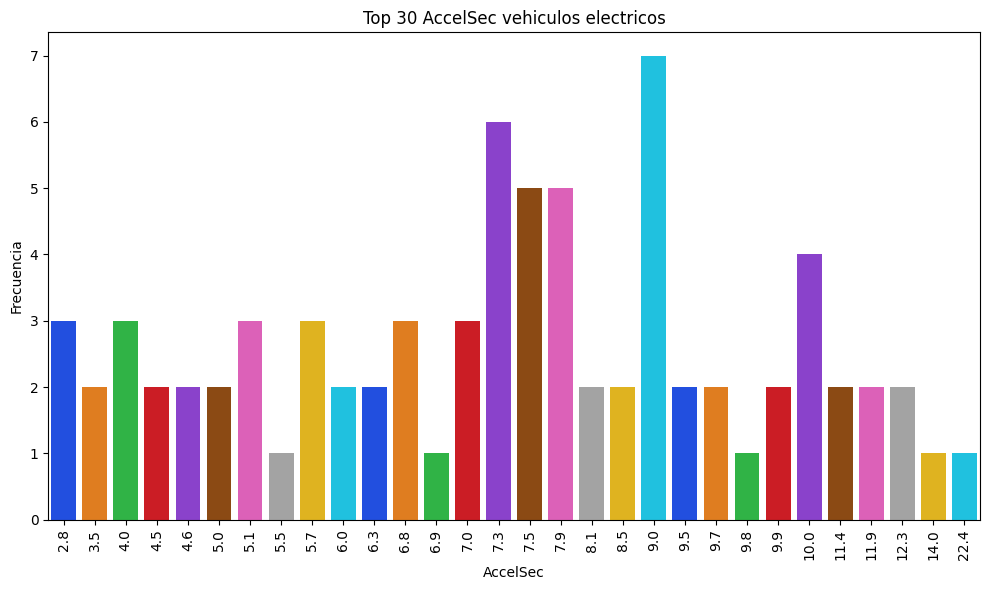

AccelSec
9.0     7
7.3     6
7.5     5
7.9     5
10.0    4
6.8     3
2.8     3
7.0     3
5.7     3
5.1     3
4.0     3
8.5     2
11.4    2
4.6     2
12.3    2
6.0     2
4.5     2
9.9     2
5.0     2
6.3     2
3.5     2
11.9    2
9.5     2
9.7     2
8.1     2
9.8     1
14.0    1
22.4    1
6.9     1
5.5     1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


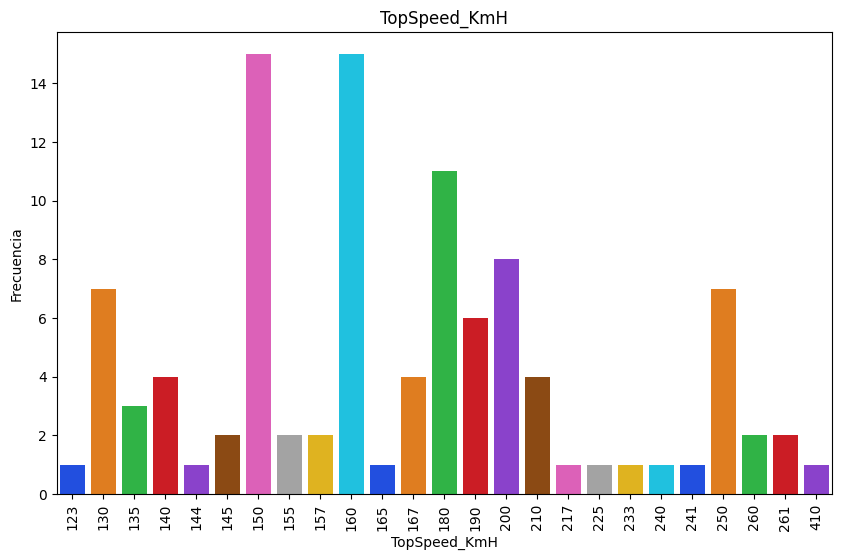

TopSpeed_KmH
160    15
150    15
180    11
200     8
250     7
130     7
190     6
167     4
210     4
140     4
135     3
157     2
260     2
155     2
145     2
261     2
410     1
241     1
233     1
240     1
217     1
165     1
144     1
225     1
123     1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


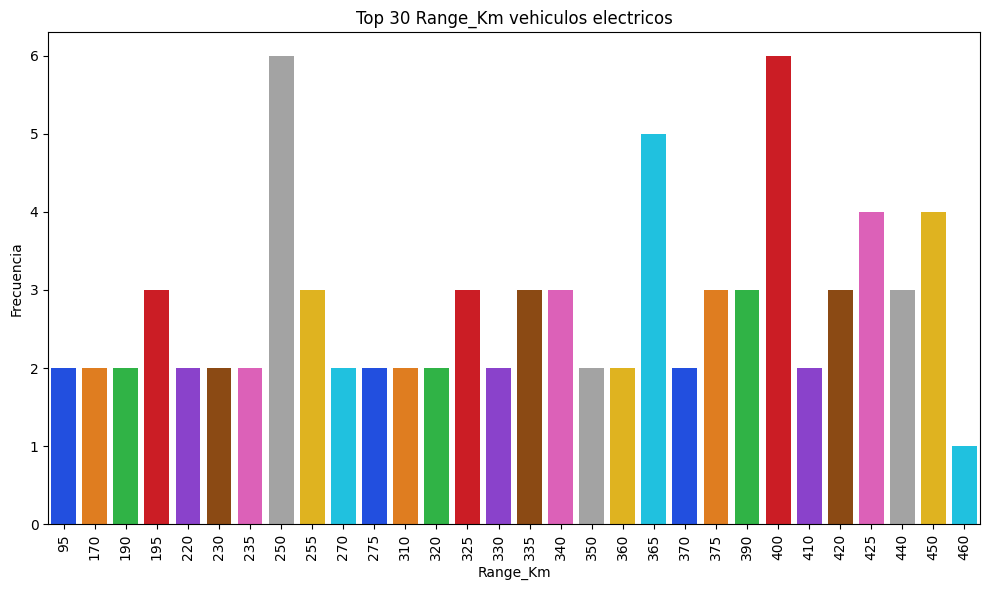

Range_Km
250    6
400    6
365    5
425    4
450    4
390    3
335    3
340    3
440    3
375    3
195    3
255    3
325    3
420    3
95     2
230    2
410    2
235    2
330    2
270    2
320    2
350    2
360    2
170    2
190    2
220    2
370    2
275    2
310    2
460    1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


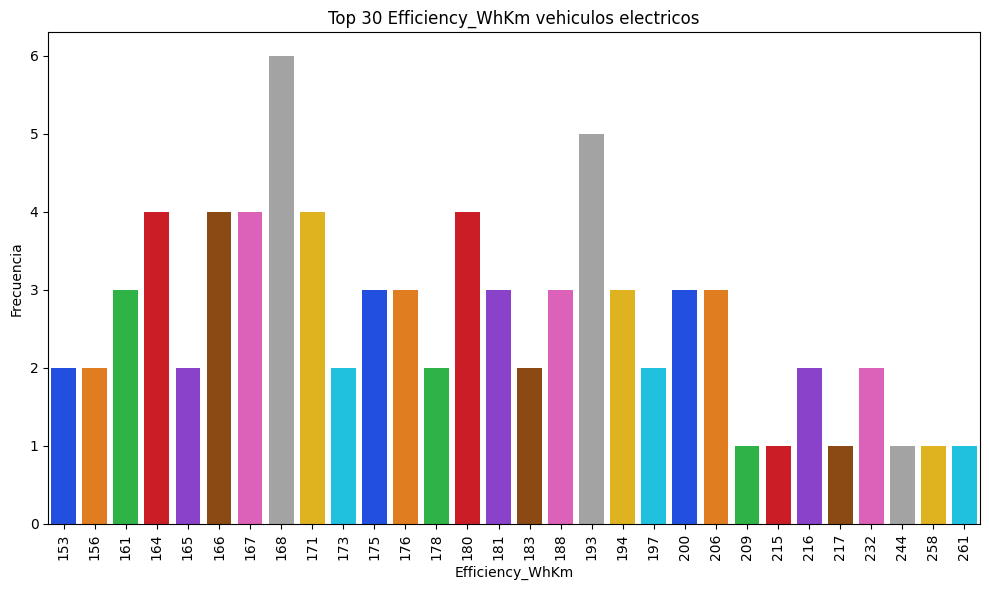

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


Efficiency_WhKm
168    6
193    5
171    4
166    4
180    4
164    4
167    4
161    3
188    3
175    3
176    3
194    3
206    3
181    3
200    3
197    2
165    2
173    2
183    2
232    2
153    2
156    2
216    2
178    2
215    1
209    1
217    1
244    1
258    1
261    1
Name: count, dtype: int64


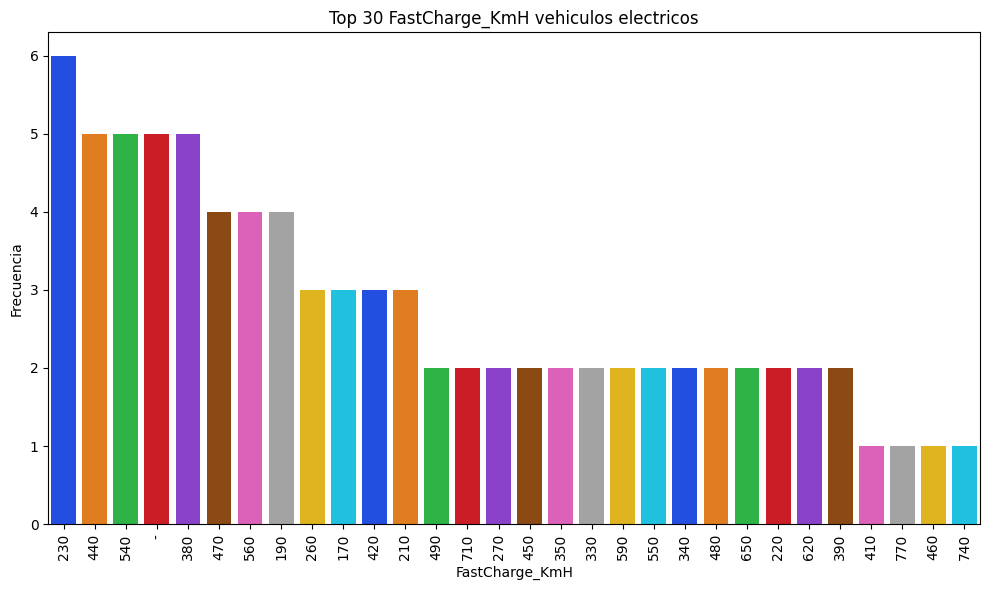

FastCharge_KmH
230    6
440    5
540    5
-      5
380    5
470    4
560    4
190    4
260    3
170    3
420    3
210    3
490    2
710    2
270    2
450    2
350    2
330    2
590    2
550    2
340    2
480    2
650    2
220    2
620    2
390    2
410    1
770    1
460    1
740    1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


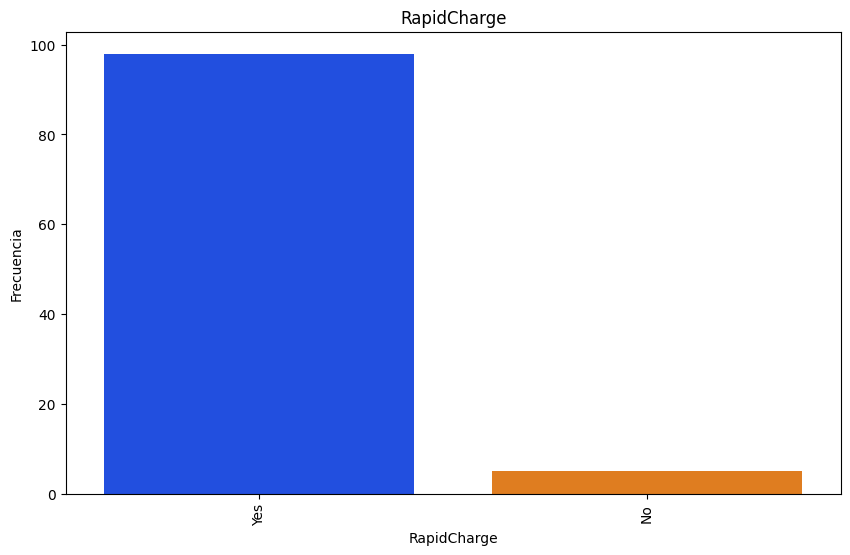

RapidCharge
Yes    98
No      5
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


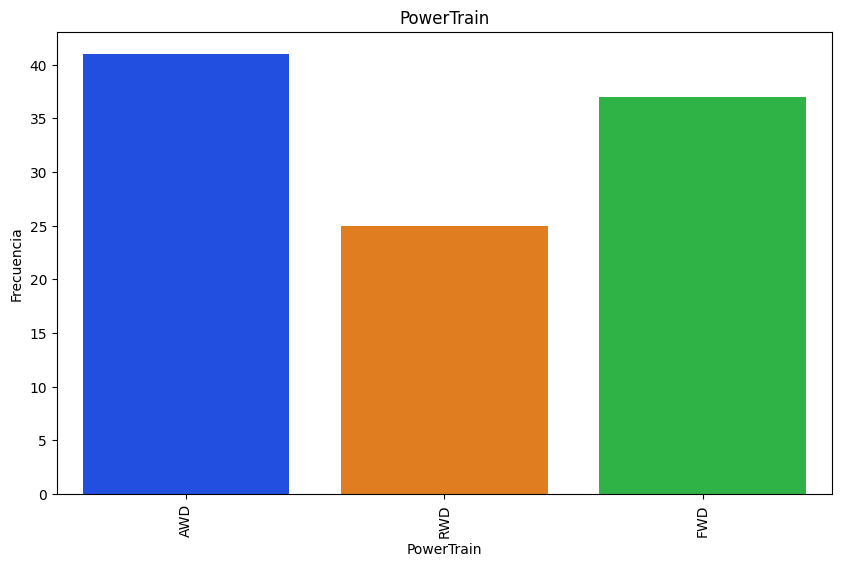

PowerTrain
AWD    41
FWD    37
RWD    25
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


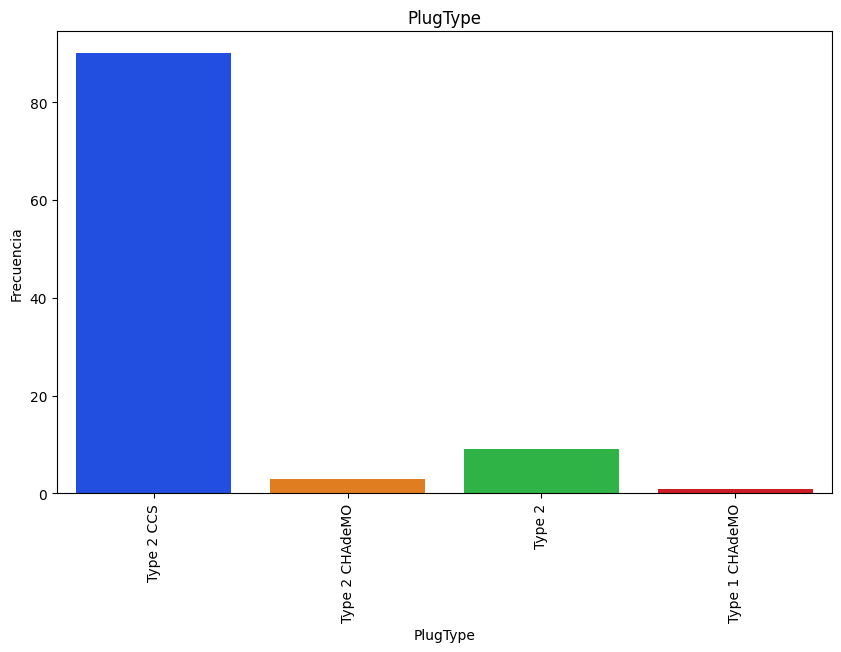

PlugType
Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


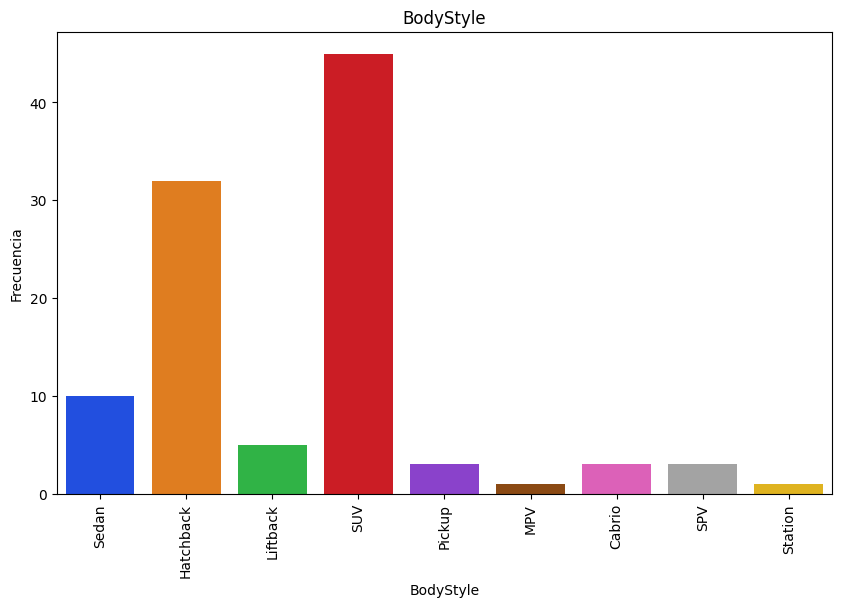

BodyStyle
SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


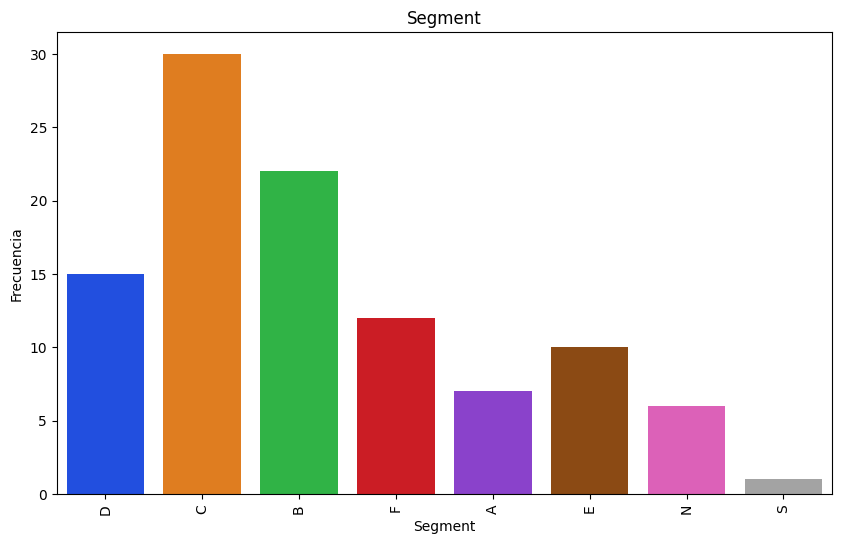

Segment
C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


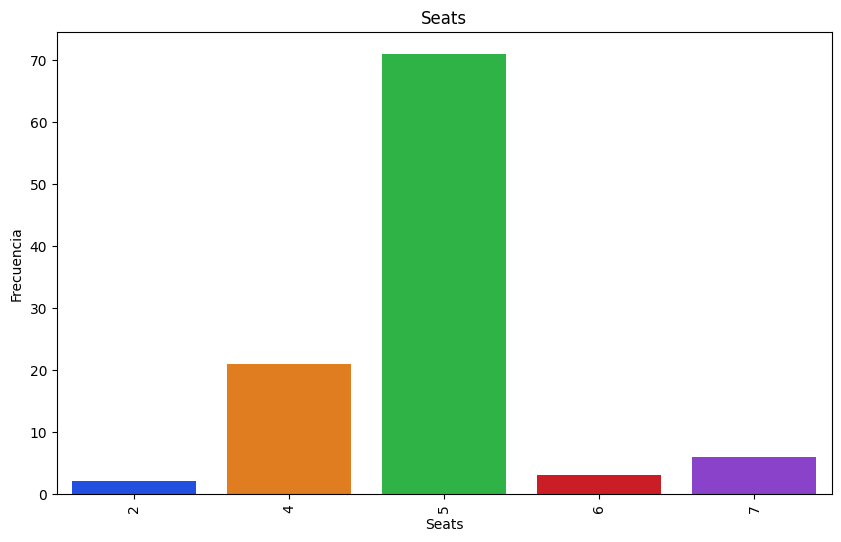

Seats
5    71
4    21
7     6
6     3
2     2
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2609441247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


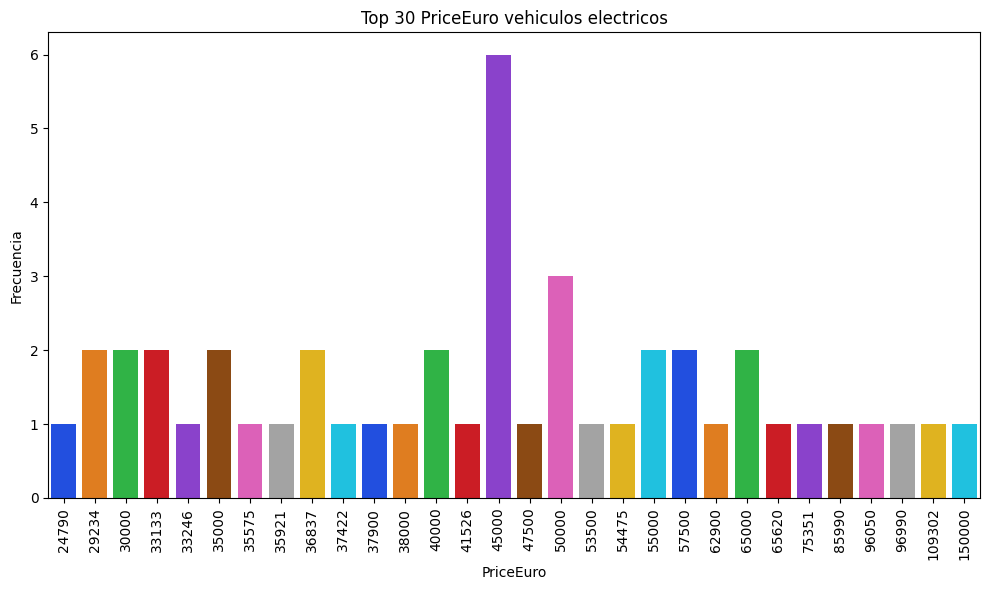

PriceEuro
45000     6
50000     3
29234     2
30000     2
36837     2
33133     2
57500     2
35000     2
65000     2
40000     2
55000     2
47500     1
75351     1
62900     1
38000     1
33246     1
109302    1
37900     1
35575     1
54475     1
65620     1
96990     1
24790     1
53500     1
96050     1
37422     1
35921     1
85990     1
41526     1
150000    1
Name: count, dtype: int64


In [12]:
for colum in df.columns:
    print(graficar_conteo(colum))

---
Marcas con menor Acceleracion de cero a  100km (medida en seg)
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\1781624678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


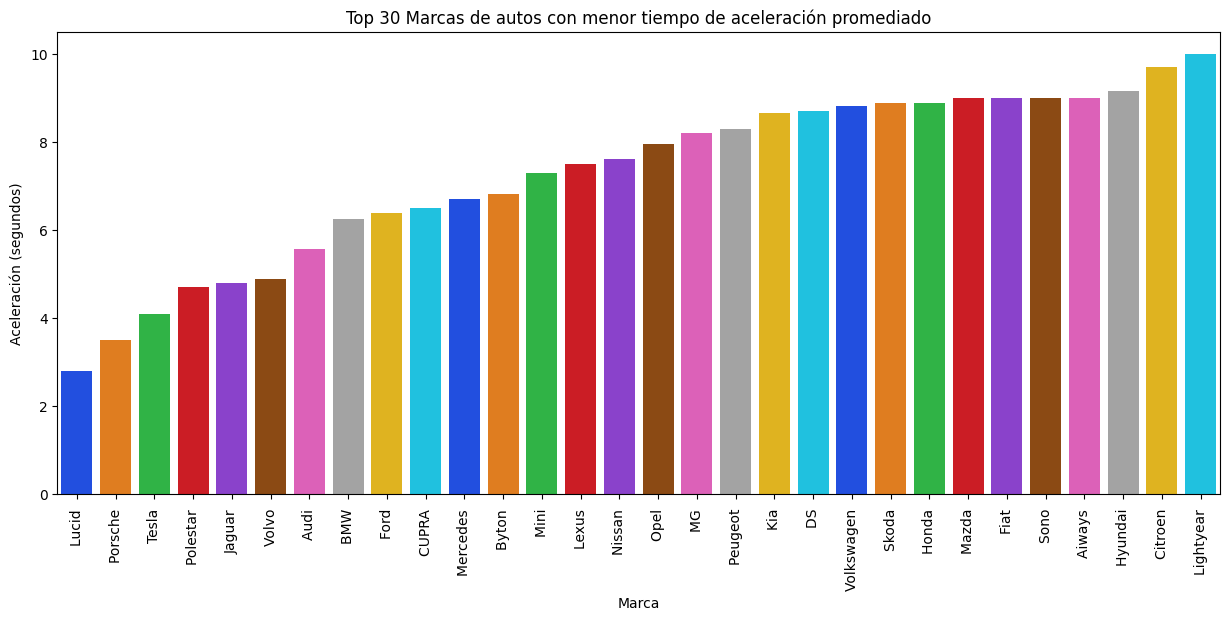

In [13]:
# Muestra los 30 datos agrupados por marca y aceleracion  
marcas_bajas = df.groupby('Brand')['AccelSec'].mean().sort_values(ascending=True).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Aceleración (segundos)')
plt.title('Top 30 Marcas de autos con menor tiempo de aceleración promediado')
plt.xticks(rotation=90)
plt.show()

In [14]:
marcas_bajas

Brand
Lucid           2.800000
Porsche         3.500000
Tesla           4.092308
Polestar        4.700000
Jaguar          4.800000
Volvo           4.900000
Audi            5.566667
BMW             6.250000
Ford            6.400000
CUPRA           6.500000
Mercedes        6.700000
Byton           6.833333
Mini            7.300000
Lexus           7.500000
Nissan          7.625000
Opel            7.966667
MG              8.200000
Peugeot         8.300000
Kia             8.660000
DS              8.700000
Volkswagen      8.812500
Skoda           8.883333
Honda           8.900000
Mazda           9.000000
Fiat            9.000000
Sono            9.000000
Aiways          9.000000
Hyundai         9.166667
Citroen         9.700000
Lightyear      10.000000
Name: AccelSec, dtype: float64

---
Marcas con mayor velocidad alcanzada en km/h
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\2888153571.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


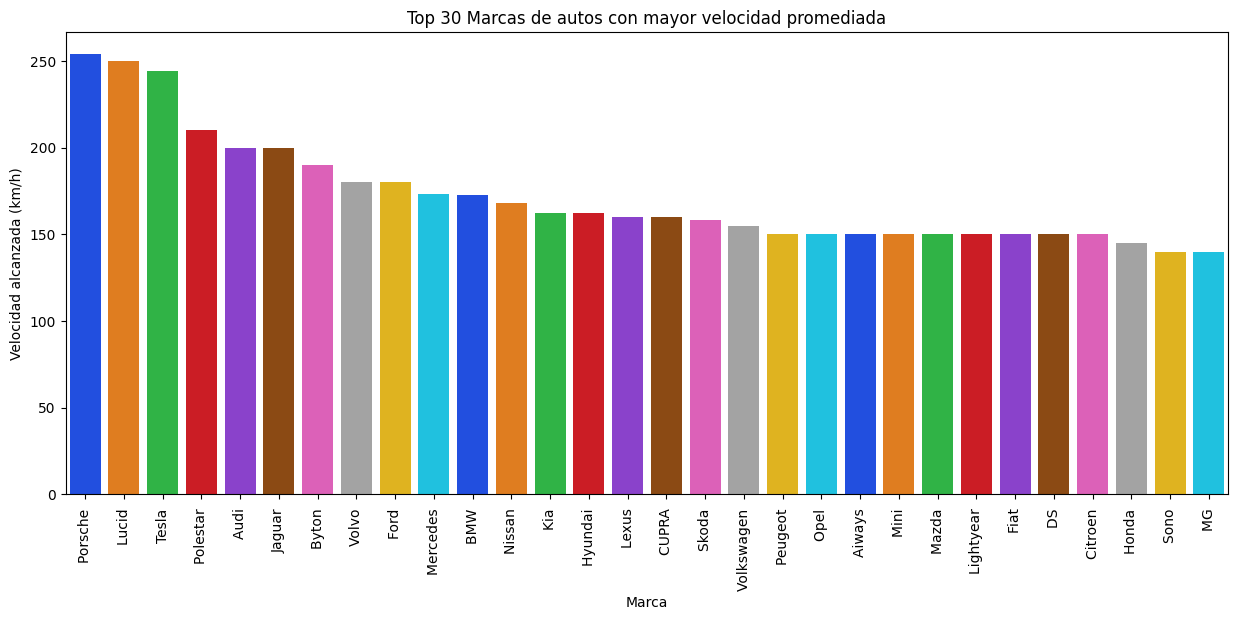

In [15]:
marcas_bajas = df.groupby('Brand')['TopSpeed_KmH'].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Velocidad alcanzada (km/h)')
plt.title('Top 30 Marcas de autos con mayor velocidad promediada')
plt.xticks(rotation=90)
plt.show()

In [16]:
marcas_bajas

Brand
Porsche        254.000000
Lucid          250.000000
Tesla          244.461538
Polestar       210.000000
Audi           200.000000
Jaguar         200.000000
Byton          190.000000
Volvo          180.000000
Ford           180.000000
Mercedes       173.333333
BMW            172.500000
Nissan         168.000000
Kia            162.600000
Hyundai        162.333333
Lexus          160.000000
CUPRA          160.000000
Skoda          158.333333
Volkswagen     155.000000
Peugeot        150.000000
Opel           150.000000
Aiways         150.000000
Mini           150.000000
Mazda          150.000000
Lightyear      150.000000
Fiat           150.000000
DS             150.000000
Citroen        150.000000
Honda          145.000000
Sono           140.000000
MG             140.000000
Name: TopSpeed_KmH, dtype: float64

---
Marcas con mayor autonomía
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\3836841540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


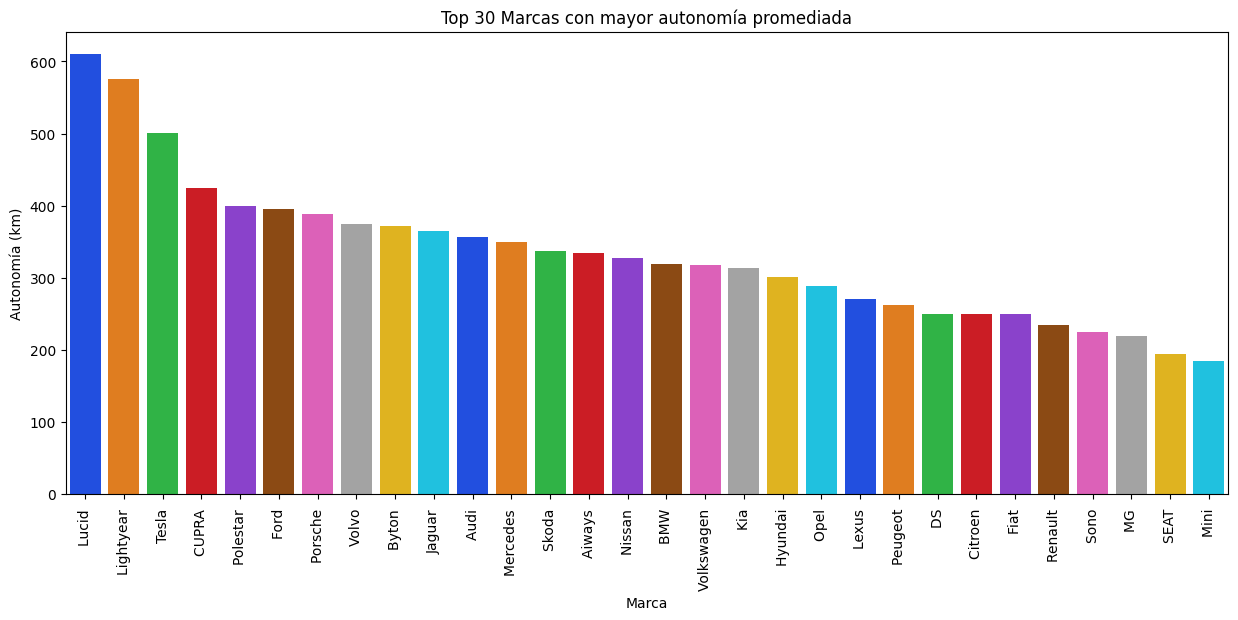

In [17]:
marcas_bajas = df.groupby('Brand')['Range_Km'].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Autonomía (km)')
plt.title('Top 30 Marcas con mayor autonomía promediada')
plt.xticks(rotation=90)
plt.show()

In [18]:
marcas_bajas

Brand
Lucid          610.000000
Lightyear      575.000000
Tesla          500.769231
CUPRA          425.000000
Polestar       400.000000
Ford           395.000000
Porsche        388.000000
Volvo          375.000000
Byton          371.666667
Jaguar         365.000000
Audi           356.666667
Mercedes       350.000000
Skoda          337.500000
Aiways         335.000000
Nissan         328.125000
BMW            318.750000
Volkswagen     318.125000
Kia            313.000000
Hyundai        301.666667
Opel           288.333333
Lexus          270.000000
Peugeot        262.500000
DS             250.000000
Citroen        250.000000
Fiat           250.000000
Renault        234.000000
Sono           225.000000
MG             220.000000
SEAT           195.000000
Mini           185.000000
Name: Range_Km, dtype: float64

---
Marcas de vehículos con menor consumo de energía por km recorrido
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\3062303813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


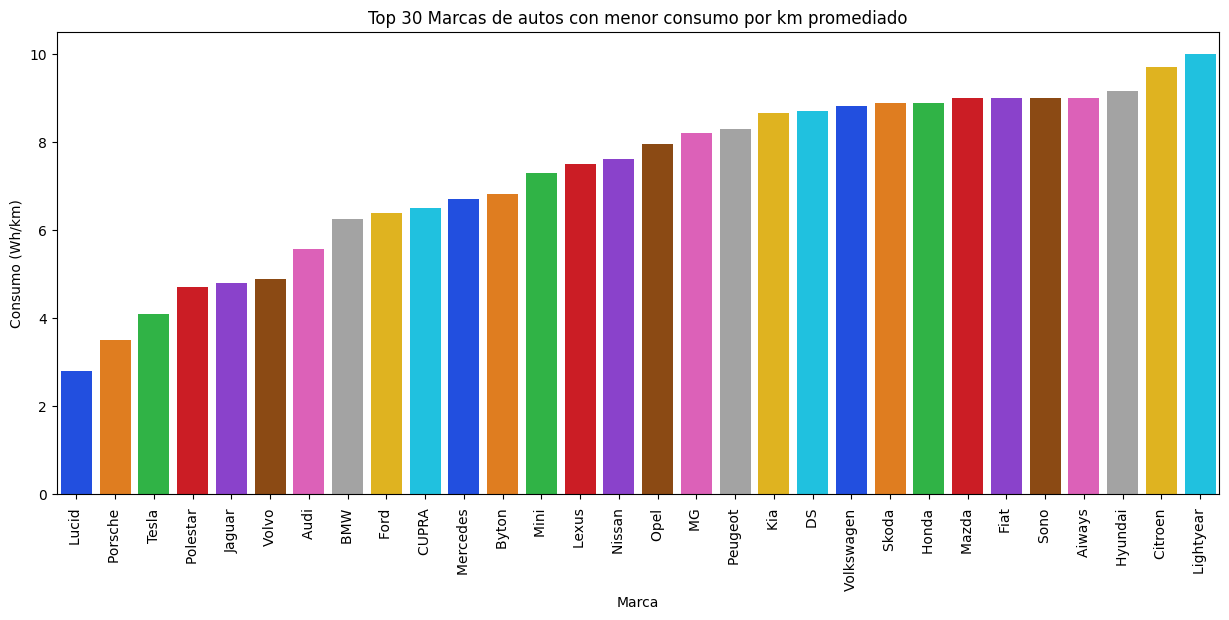

In [19]:
# Muestra los 30 datos agrupados por marca y eficiencia
marcas_bajas = df.groupby('Brand')['AccelSec'].mean().sort_values(ascending=True).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Consumo (Wh/km)')
plt.title('Top 30 Marcas de autos con menor consumo por km promediado')
plt.xticks(rotation=90)
plt.show()

In [20]:
marcas_bajas

Brand
Lucid           2.800000
Porsche         3.500000
Tesla           4.092308
Polestar        4.700000
Jaguar          4.800000
Volvo           4.900000
Audi            5.566667
BMW             6.250000
Ford            6.400000
CUPRA           6.500000
Mercedes        6.700000
Byton           6.833333
Mini            7.300000
Lexus           7.500000
Nissan          7.625000
Opel            7.966667
MG              8.200000
Peugeot         8.300000
Kia             8.660000
DS              8.700000
Volkswagen      8.812500
Skoda           8.883333
Honda           8.900000
Mazda           9.000000
Fiat            9.000000
Sono            9.000000
Aiways          9.000000
Hyundai         9.166667
Citroen         9.700000
Lightyear      10.000000
Name: AccelSec, dtype: float64

---
Marcas de autos con mayor carga rápida kWh (Kilovatios hora)
---
---

In [21]:
df['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [22]:
df['FastCharge_KmH'] = df['FastCharge_KmH'].replace('-',0)

In [23]:
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\353271892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


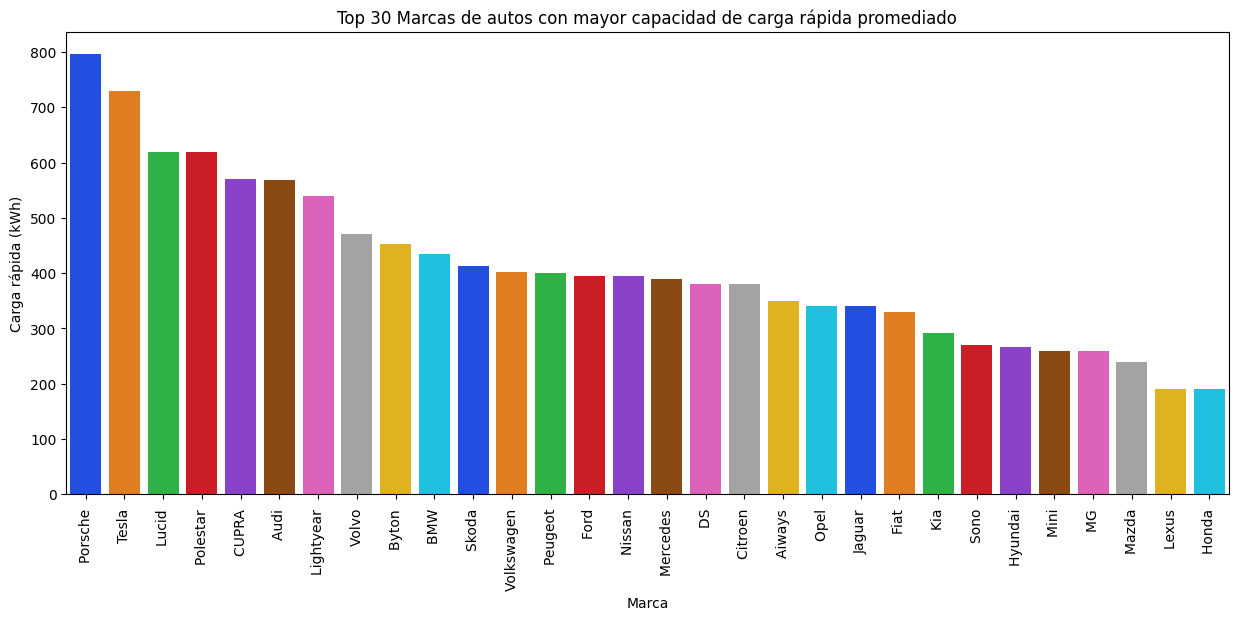

In [24]:
# Muestra los 30 datos agrupados por marca y eficiencia
marcas_bajas = df.groupby('Brand')['FastCharge_KmH'].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Carga rápida (kWh)')
plt.title('Top 30 Marcas de autos con mayor capacidad de carga rápida promediado')
plt.xticks(rotation=90)
plt.show()

In [25]:
marcas_bajas

Brand
Porsche        796.000000
Tesla          730.000000
Lucid          620.000000
Polestar       620.000000
CUPRA          570.000000
Audi           567.777778
Lightyear      540.000000
Volvo          470.000000
Byton          453.333333
BMW            435.000000
Skoda          413.333333
Volkswagen     402.500000
Peugeot        400.000000
Ford           395.000000
Nissan         395.000000
Mercedes       390.000000
DS             380.000000
Citroen        380.000000
Aiways         350.000000
Opel           340.000000
Jaguar         340.000000
Fiat           330.000000
Kia            292.000000
Sono           270.000000
Hyundai        266.666667
Mini           260.000000
MG             260.000000
Mazda          240.000000
Lexus          190.000000
Honda          190.000000
Name: FastCharge_KmH, dtype: float64

---
Marcas de autos equipados con carga rapida
---
---

In [26]:
df['RapidCharge'].value_counts()

RapidCharge
Yes    98
No      5
Name: count, dtype: int64

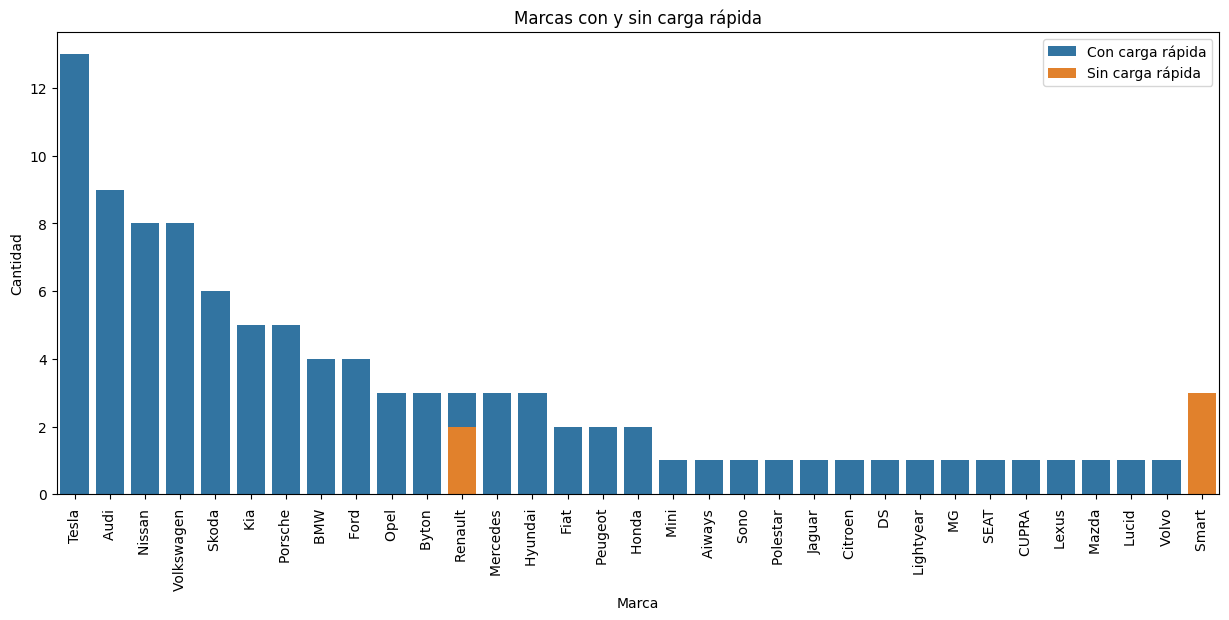

In [27]:
marcas_con_carga_rapida = df[df['RapidCharge'] == 'Yes']['Brand'].value_counts()
marcas_sin_carga_rapida = df[df['RapidCharge'] == 'No']['Brand'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_con_carga_rapida.index, y=marcas_con_carga_rapida.values, label='Con carga rápida')
sns.barplot(x=marcas_sin_carga_rapida.index, y=marcas_sin_carga_rapida.values, label='Sin carga rápida')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.title('Marcas con y sin carga rápida')
plt.xticks(rotation=90)
plt.legend()
plt.show()

---
Marcas y su tipo de propulsión 
---
---

In [28]:
df['PowerTrain'].value_counts()

PowerTrain
AWD    41
FWD    37
RWD    25
Name: count, dtype: int64

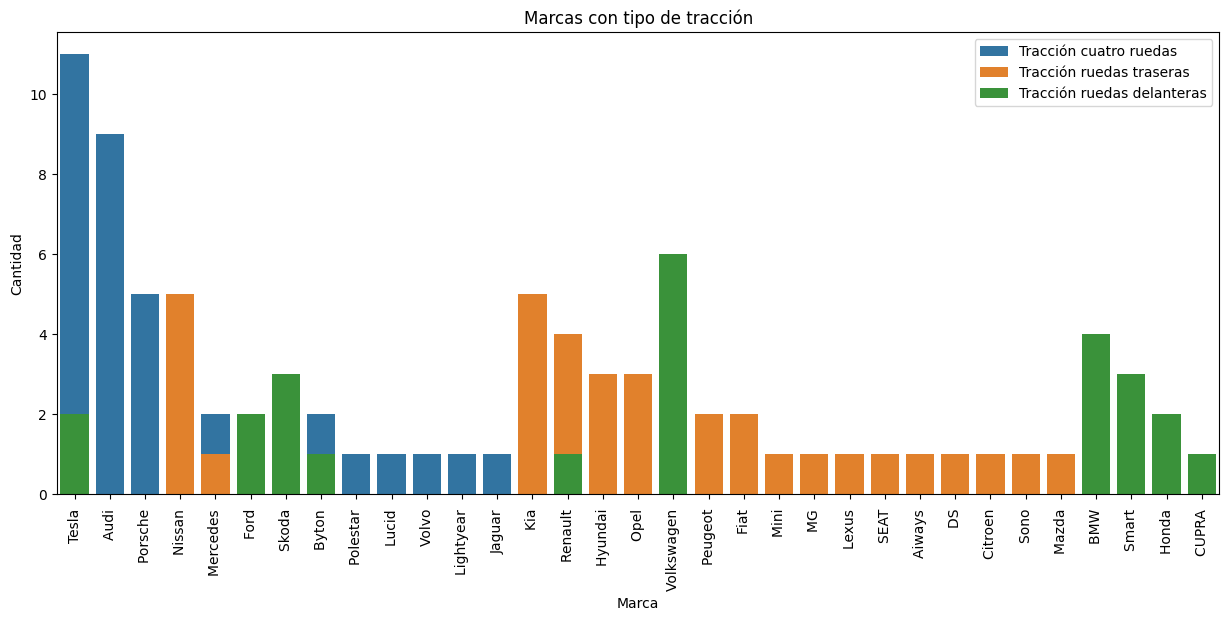

In [29]:
marcas_awd = df[df['PowerTrain'] == 'AWD']['Brand'].value_counts()
marcas_fwd = df[df['PowerTrain'] == 'FWD']['Brand'].value_counts()
marcas_rwd = df[df['PowerTrain'] == 'RWD']['Brand'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_awd.index, y=marcas_awd.values, label='Tracción cuatro ruedas')
sns.barplot(x=marcas_fwd.index, y=marcas_fwd.values, label='Tracción ruedas traseras')
sns.barplot(x=marcas_rwd.index, y=marcas_rwd.values, label='Tracción ruedas delanteras')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.title('Marcas con tipo de tracción')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [30]:
marcas_awd
marcas_fwd
marcas_rwd

Brand
Volkswagen     6
BMW            4
Skoda          3
Smart          3
Honda          2
Tesla          2
Ford           2
CUPRA          1
Renault        1
Byton          1
Name: count, dtype: int64

---
PlugType - Indica el conector utilizado por el vehículo eléctrico y lo relaciona con las marcas
---
---

In [31]:
df['PlugType'].value_counts()

PlugType
Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: count, dtype: int64

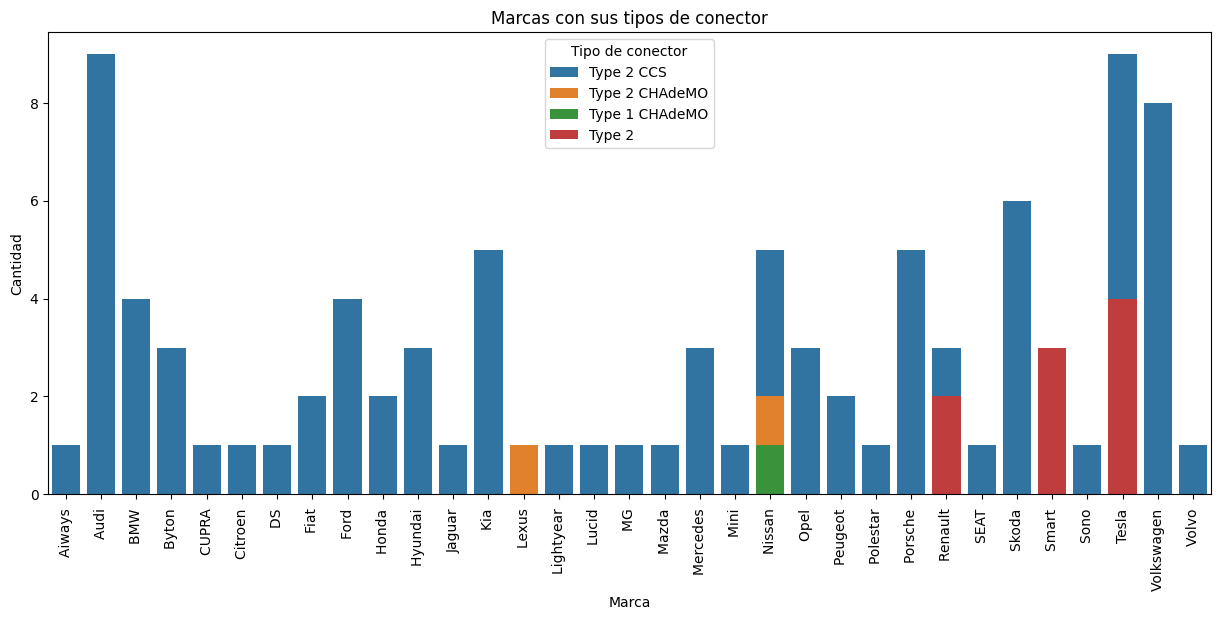

In [32]:
marcas_conectores = df.groupby(['Brand', 'PlugType']).size().reset_index(name='Cantidad')

plt.figure(figsize=(15,6))
sns.barplot(x='Brand', y='Cantidad', hue='PlugType', data=marcas_conectores, dodge=False)
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.title('Marcas con sus tipos de conector')
plt.legend(title='Tipo de conector')
plt.xticks(rotation=90)
plt.show()

---
Marca de vehiculo electrico ordenada por precio
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\3889499755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


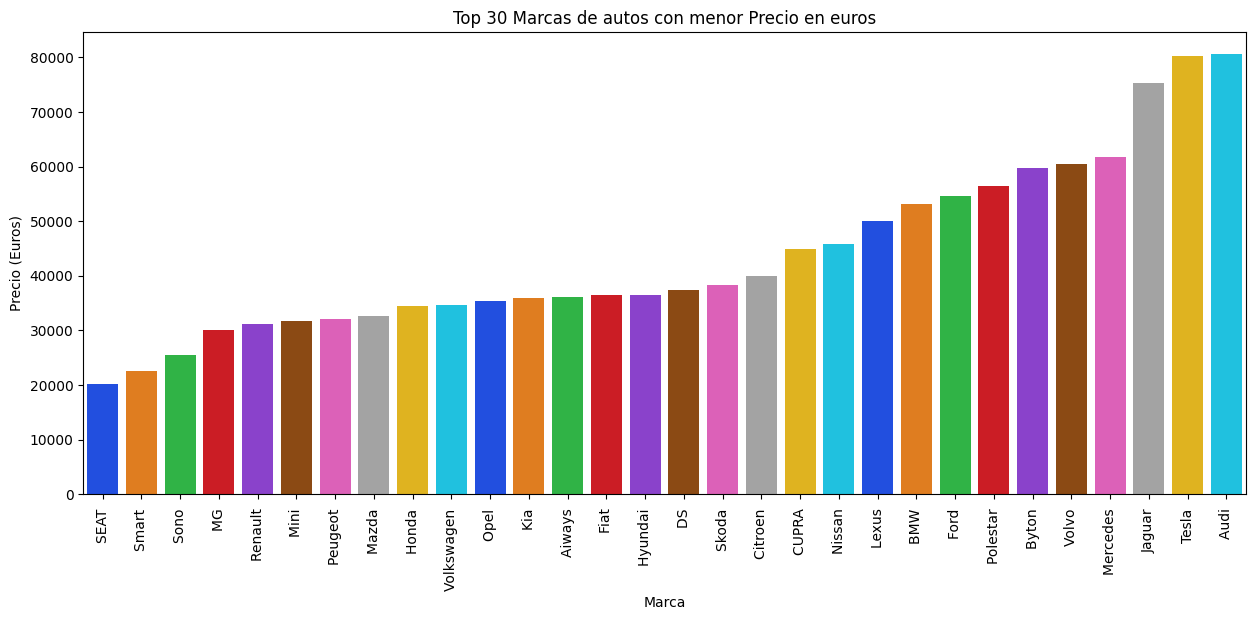

In [33]:
# Muestra los 30 datos agrupados por marca y eficiencia
marcas_bajas = df.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=True).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Precio (Euros)')
plt.title('Top 30 Marcas de autos con menor Precio en euros')
plt.xticks(rotation=90)
plt.show()

In [34]:
marcas_bajas

Brand
SEAT           20129.000000
Smart          22660.666667
Sono           25500.000000
MG             30000.000000
Renault        31268.200000
Mini           31681.000000
Peugeot        32021.500000
Mazda          32646.000000
Honda          34459.000000
Volkswagen     34602.375000
Opel           35350.666667
Kia            35862.400000
Aiways         36057.000000
Fiat           36400.000000
Hyundai        36408.333333
DS             37422.000000
Skoda          38255.666667
Citroen        40000.000000
CUPRA          45000.000000
Nissan         45902.125000
Lexus          50000.000000
BMW            53145.750000
Ford           54568.750000
Polestar       56440.000000
Byton          59833.333333
Volvo          60437.000000
Mercedes       61705.000000
Jaguar         75351.000000
Tesla          80272.307692
Audi           80593.666667
Name: PriceEuro, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21744\585728714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')


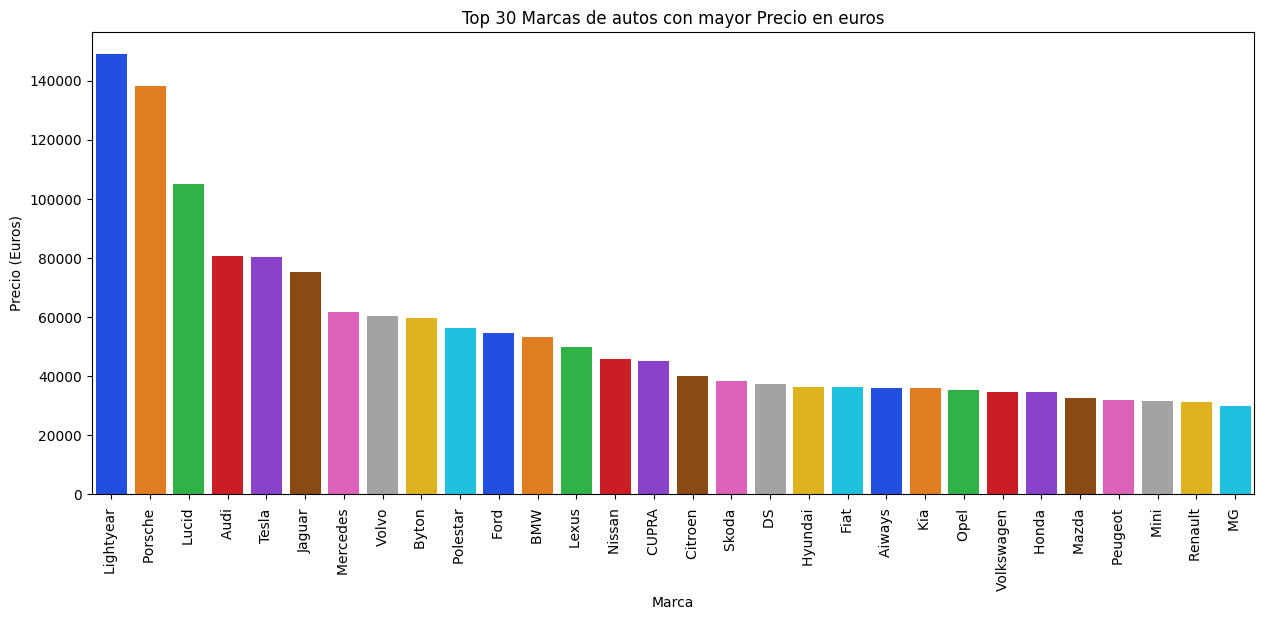

In [35]:
# Muestra los 30 datos agrupados por marca y eficiencia
marcas_bajas = df.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(15,6))
sns.barplot(x=marcas_bajas.index, y=marcas_bajas.values, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Precio (Euros)')
plt.title('Top 30 Marcas de autos con mayor Precio en euros')
plt.xticks(rotation=90)
plt.show()